## Part 1 ‐ Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
df.sort_values(by = 'login_time')

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
...,...
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93141,1970-04-13 18:54:23


In [5]:
df = df.set_index('login_time')

In [6]:
df['Counter'] = 0
df = df.resample('15min').count()

In [7]:
df = df.reset_index()
df

,login_time,Counter
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


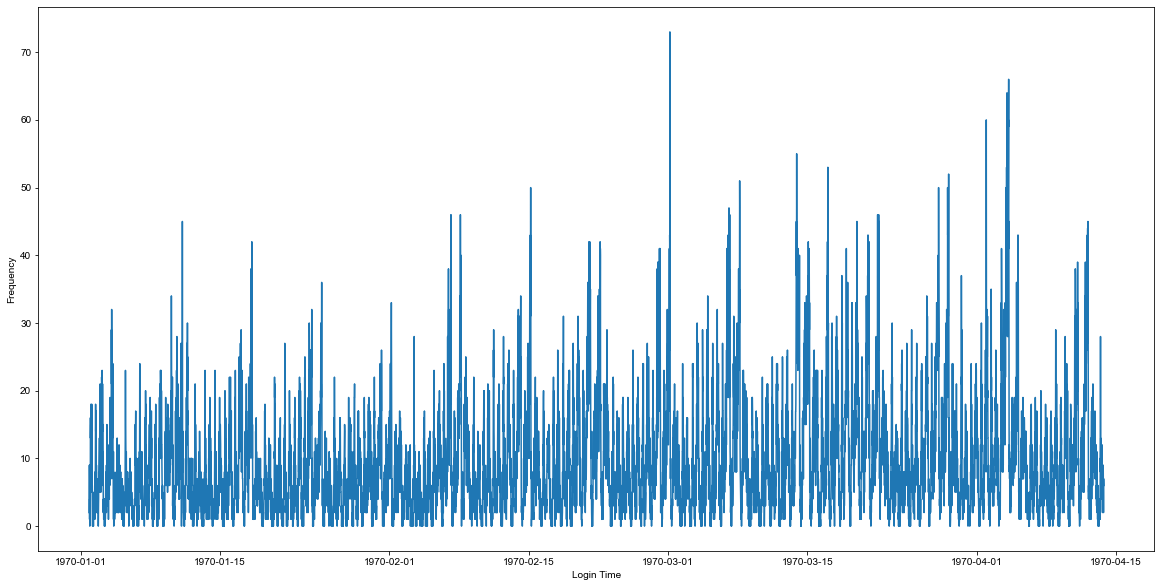

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(df['login_time'], df['Counter'])
plt.xlabel('Login Time')
plt.ylabel('Frequency')
sns.set()

In [9]:
df.describe()

,Counter
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


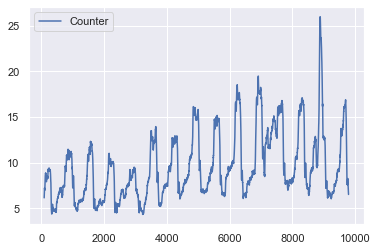

In [10]:
df.rolling(window=97).mean().plot()
plt.show()

Demand is rising as time goes by. Lets take the time of month and zoom in.

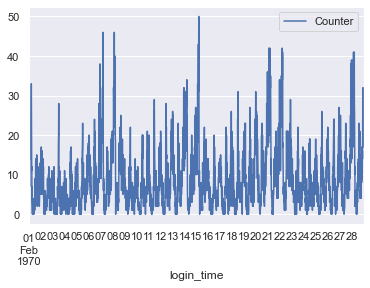

In [11]:
#reset to avoid errors
df = df.set_index('login_time')

df.loc['1970-02'].plot()
plt.show()

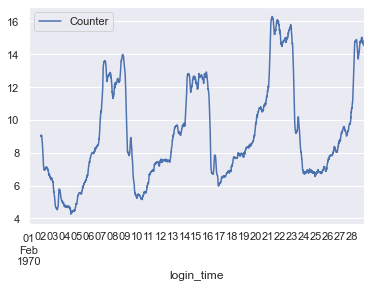

In [12]:
df.loc['1970-02'].rolling(window=96).mean().plot()
plt.show()

Looking at the days, the Counter rises for the weekend and drops right after.

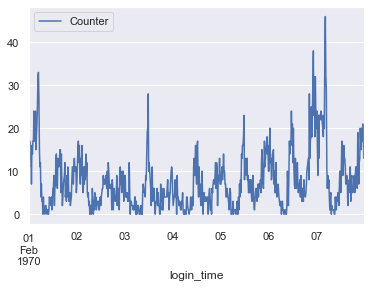

In [13]:
df.loc['1970-02-01':'1970-02-07'].plot()
plt.show()

Showing the Counter from Sunday to Saturday, the count rises over the weekend.

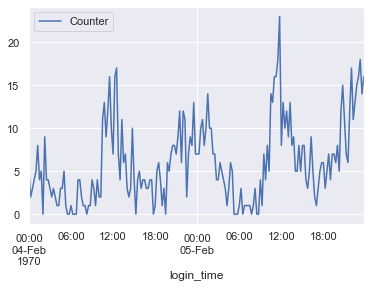

In [14]:
df.loc['1970-02-04':'1970-02-05'].plot()
plt.show()

Showing the Counter over 2 weekdays, the demand is highest around noon with some pickup at midnight

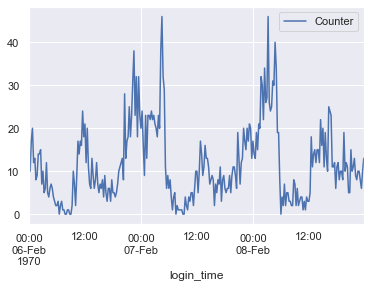

In [15]:
df.loc['1970-02-06':'1970-02-08'].plot()
plt.show()

Plotting over a weekend, we see the Counter is highest after midnight.

Lets look at them through a histogram

<AxesSubplot:>

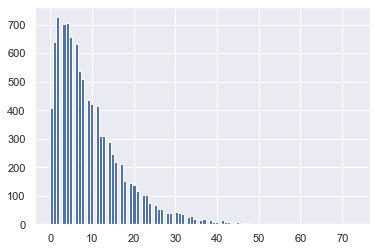

In [16]:
df.Counter.hist(bins = 100)

This shows an exponential distribution of login counts.

<BarContainer object of 24 artists>

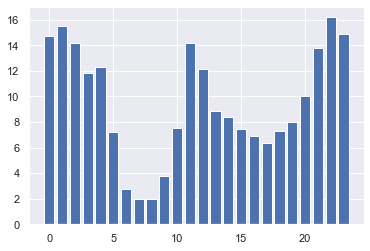

In [17]:
#take the mean of the counts in a 24 hour window
hours = np.empty(24)

for i in range(24):
    hours[i] = df[df.index.hour == i].mean()
    
plt.bar(range(24), hours)

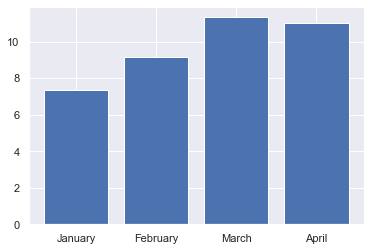

In [18]:
months = np.empty(4)

for i in range(4):
    months[i] = df[df.index.month == i + 1].mean()
    
plt.bar(range(1, 5), months)
_ = plt.xticks(range(1, 5),labels=['January', 'February', 'March', 'April'])

Mean monthly count increases per month

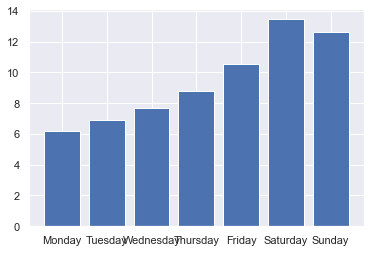

In [19]:
weekday = np.empty(7)

for i in range(7):
    weekday[i] = df[df.index.weekday == i].mean()
    
plt.bar(range(7), weekday)
_ = plt.xticks(range(7),labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Logins increases through the week, with the peak during the weekend

# Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a) how you will implement the experiment
    
    b) what statistical test(s) you will conduct to verify the significance of the observation
    
    c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

To encourage driver partners to serve both cities, the key measurement would be to track driver's movements. This can be done through a myriad of ways such as seeing the number of reimburesements of tolls completed or through a tracker that will physically track the driver/vehicle on the roads of both cities. An alternate option could be to measure the activity of the city throughout the day; if more people integrate with the other city, then the level of activity in each city will increase and decrease opposite of the circadian rhythm, but this will be much more difficult to measure. 

When tracking the number of reimbursements, you would be able to see both the entrance time of when they left the city and when they re-entered the city. The total time spent on the city can then be calculated by physically tracking the driver/vehicle location on the road, you can then see how often the driver spends on the other city and how many individual rides they provide their service to. 

This will be a difficulty comparison as multiple other factors affect the overall outcome such as number of expected customers, time spent driving from one city to another, driver incentive to remain in the city, etc. The best days to measure would be the weekend as both cities contain reasonable activity. 

A statistical test that can be used is an Independent Group t-test as each group of drivers are different as they come from their respective cities. This does require each group to be normally distributed and the variance to be the same where the means of the two groups are compared at the end. The decision if their is a significant difference will depend on the p-value; if it is below a certain value then it does have significant difference. 

If the time spend of drivers their respective counterpart city increases by a statistical significance, then the toll reimbursement would have been a success. This value can then be compared to the total amount reimbursed for comparison in profits. 

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

In [20]:
data = pd.read_json('ultimate_data_challenge.json')
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [21]:
data.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [22]:
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

In [23]:
#day data was pulled
last_day = data['last_trip_date'].max()
last_day

Timestamp('2014-07-01 00:00:00')

In [24]:
#the user is considered active if they were active in the last 30 days
#if active = 1 then active, else inactive
cut_off_day = last_day - timedelta(days = 30)
data['active_status'] = (data['last_trip_date'] > cut_off_day).astype('int')

In [25]:
#created dummy values for all phones and cities
data = pd.get_dummies(data, columns = ['city', 'phone'])
data

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_status,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.0,1.00,2014-06-05,0.0,False,100.0,5.63,4.2,1,0,1,0,0,1
49996,1,2014-01-24,NaN,1.00,2014-01-25,0.0,False,0.0,0.00,4.0,0,1,0,0,0,1
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,True,100.0,3.86,5.0,0,0,0,1,1,0
49998,2,2014-01-14,3.0,1.00,2014-01-15,0.0,False,100.0,4.58,3.5,0,1,0,0,0,1


In [26]:
#separate the active and inactive users
active_user = data[data['active_status'] == 1]
inactive_user = data[data['active_status'] == 0]

In [27]:
#percent of users retained
round(len(active_user)/len(data) * 100, 2)

36.62

In [28]:
active_user.columns

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'active_status',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone'],
      dtype='object')

In [29]:
#calculating the mean and standard deviation for each feature
feature_columns = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge','surge_pct', 
                   'ultimate_black_user', 'weekday_pct', 'city_Astapor', 
                   "city_King's Landing", 'city_Winterfell', 'phone_Android','phone_iPhone']
stats_dict = {}
for col in feature_columns:
    stats_dict[col] = [active_user[col].mean(), active_user[col].std(),
                       inactive_user[col].mean(),inactive_user[col].std()]

In [30]:
#create df
stats_df = pd.DataFrame.from_dict(stats_dict, 
                                  orient='index').rename(columns = 
                                                         {0:'active_mean', 
                                                          1:'active_std', 2:'inactive_mean', 3:'inactive_std'})

Text(0, 0.5, 'Mean')

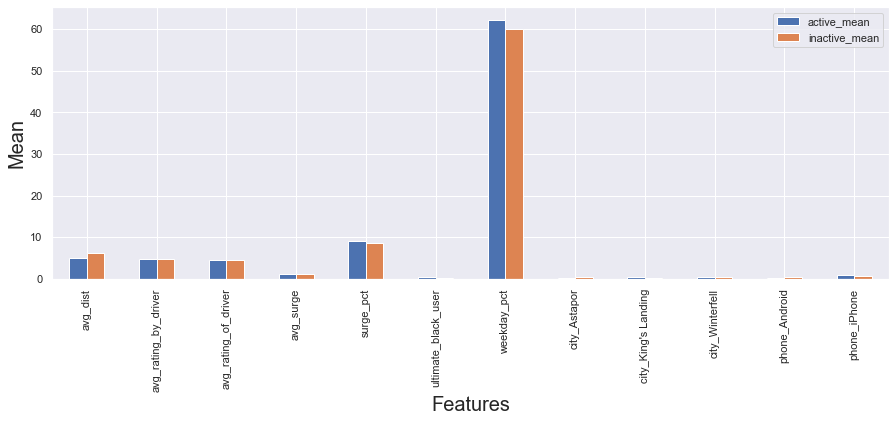

In [31]:
stats_df[['active_mean', 'inactive_mean']].plot(kind = 'bar', figsize = (15,5))
plt.xlabel('Features',fontsize = 20)
plt.ylabel('Mean', fontsize = 20)

No real difference between the features for active and inactive users. We will use XGBoost.

In [32]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, cv, plot_importance
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [33]:
#remove warnings
import xgboost
xgboost.set_config(verbosity=0)

In [34]:
X = data[feature_columns]
y = data['active_status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [35]:
parameters = {
    'learning_rate': [0.01,0.1,0.2],
    'scale_pos_weight': [0.7,0.8,0.9,1],
    'colsample_bytree' : [0.5,0.7,0.9],
    'subsample' : [0.8,0.9,1],
    'max_delta_step': [0,0.025,0.05],
    'max_depth' : [5,6,7],
    'gamma':[1,2,3,4]}

In [36]:
#originally performing grid search but was taking a very long time
from sklearn.model_selection import RandomizedSearchCV
xg_clf = XGBClassifier(objective = 'binary:logistic', random_state = 42, silent = 1, n_estimators=1000,
                       eval_metric='rmse', use_label_encoder =False)
rand = RandomizedSearchCV(estimator = xg_clf, param_distributions= parameters, n_iter = 50, cv=3, scoring='accuracy', random_state=42)
rand.fit(X,y)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='rmse', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           m...
                                           scale_pos_weight=None, silent=1,
                                           subsample=None, tr

In [37]:
print(rand.best_score_)
print(rand.best_params_)

0.7900400698334287
{'subsample': 0.8, 'scale_pos_weight': 1, 'max_depth': 6, 'max_delta_step': 0, 'learning_rate': 0.01, 'gamma': 2, 'colsample_bytree': 0.9}


We will compare the optimized and original model

In [38]:
optimized_parameters = {'objective':'binary:logistic',
                        'n_estimators': 1000,
                        'random_state': 42,
                        'silent': 1,
                        'subsample': 0.8, 
                        'scale_pos_weight': 1,
                        'colsample_bytree' : 0.9,
                        'max_depth': 6, 
                        'max_delta_step': 0, 
                        'learning_rate': 0.01, 
                        'gamma': 2
                       }

In [39]:
#optimized classifier
xg_clf_opt = XGBClassifier(**optimized_parameters, eval_metric='rmse', use_label_encoder =False)
xg_clf_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='rmse', gamma=2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, silent=1, subsample=0.8, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

In [40]:
#predict the labels of OPTIMIZED model using the training set
y_opt_pred = xg_clf_opt.predict(X_train)
score = accuracy_score(y_train, y_opt_pred)
print("Accuracy: {}.".format(round(score,4)))

Accuracy: 0.8086.


In [41]:
# predict the labels of UNOPTIMIZED model using the training set
xg_clf.fit(X_train, y_train)
y_unopt_pred = xg_clf.predict(X_train)
un_score = accuracy_score(y_train, y_unopt_pred)
print("Accuracy: {}.".format(round(un_score,4)))

Accuracy: 0.933.


The unoptimized model performed much better on the training set.

Now we see the results on the test set.

In [42]:
# predict the labels of OPTIMIZED model using the test set
y_opt_test = xg_clf_opt.predict(X_test)
# score model
test_score = accuracy_score(y_test, y_opt_test)
# print accuracy
print("Accuracy: {}.".format(round(test_score,4)))

Accuracy: 0.7866.


In [43]:
# predict the labels of UNOPTIMIZED model using the test set
y_unopt_test = xg_clf.predict(X_test)
test_score = accuracy_score(y_test, y_unopt_test)
print("Accuracy: {}.".format(round(test_score,4)))

Accuracy: 0.7656.


The optimized model performed slightly better with the test set.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

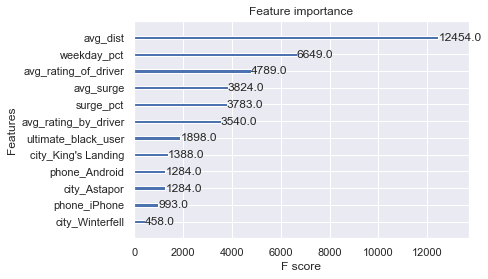

In [46]:
plot_importance(xg_clf_opt)